## Análise Exploratória
Nesta etapa, exploraremos as relações entre as variáveis de saúde e orçamento.

    ano  id_municipio sigla_uf          nome  cob_ab  cob_acs  cob_esf  \
0  2010       1200013       AC    Acrelândia   100.0    100.0    100.0   
1  2010       1200054       AC  Assis Brasil   100.0    100.0    100.0   
2  2010       1200104       AC     Brasiléia   100.0    100.0    100.0   
3  2010       1200138       AC        Bujari   100.0    100.0    100.0   
4  2010       1200179       AC      Capixaba   100.0    100.0    100.0   

   cob_vac_bcg  cob_vac_rota  cob_vac_menin  ...  desp_recp_saude_pc_mun  \
0    42.962963     57.037037       1.111111  ...                  100.42   
1    55.357143     37.500000       0.000000  ...                  210.32   
2   100.000000     88.322718       0.000000  ...                  104.82   
3    90.566038    100.000000       0.000000  ...                  130.27   
4    49.746193     67.512690       0.000000  ...                   98.98   

   pct_desp_recp_saude_uf  desp_tot_saude_pc_uf  desp_recp_saude_pc_uf  \
0                     0.

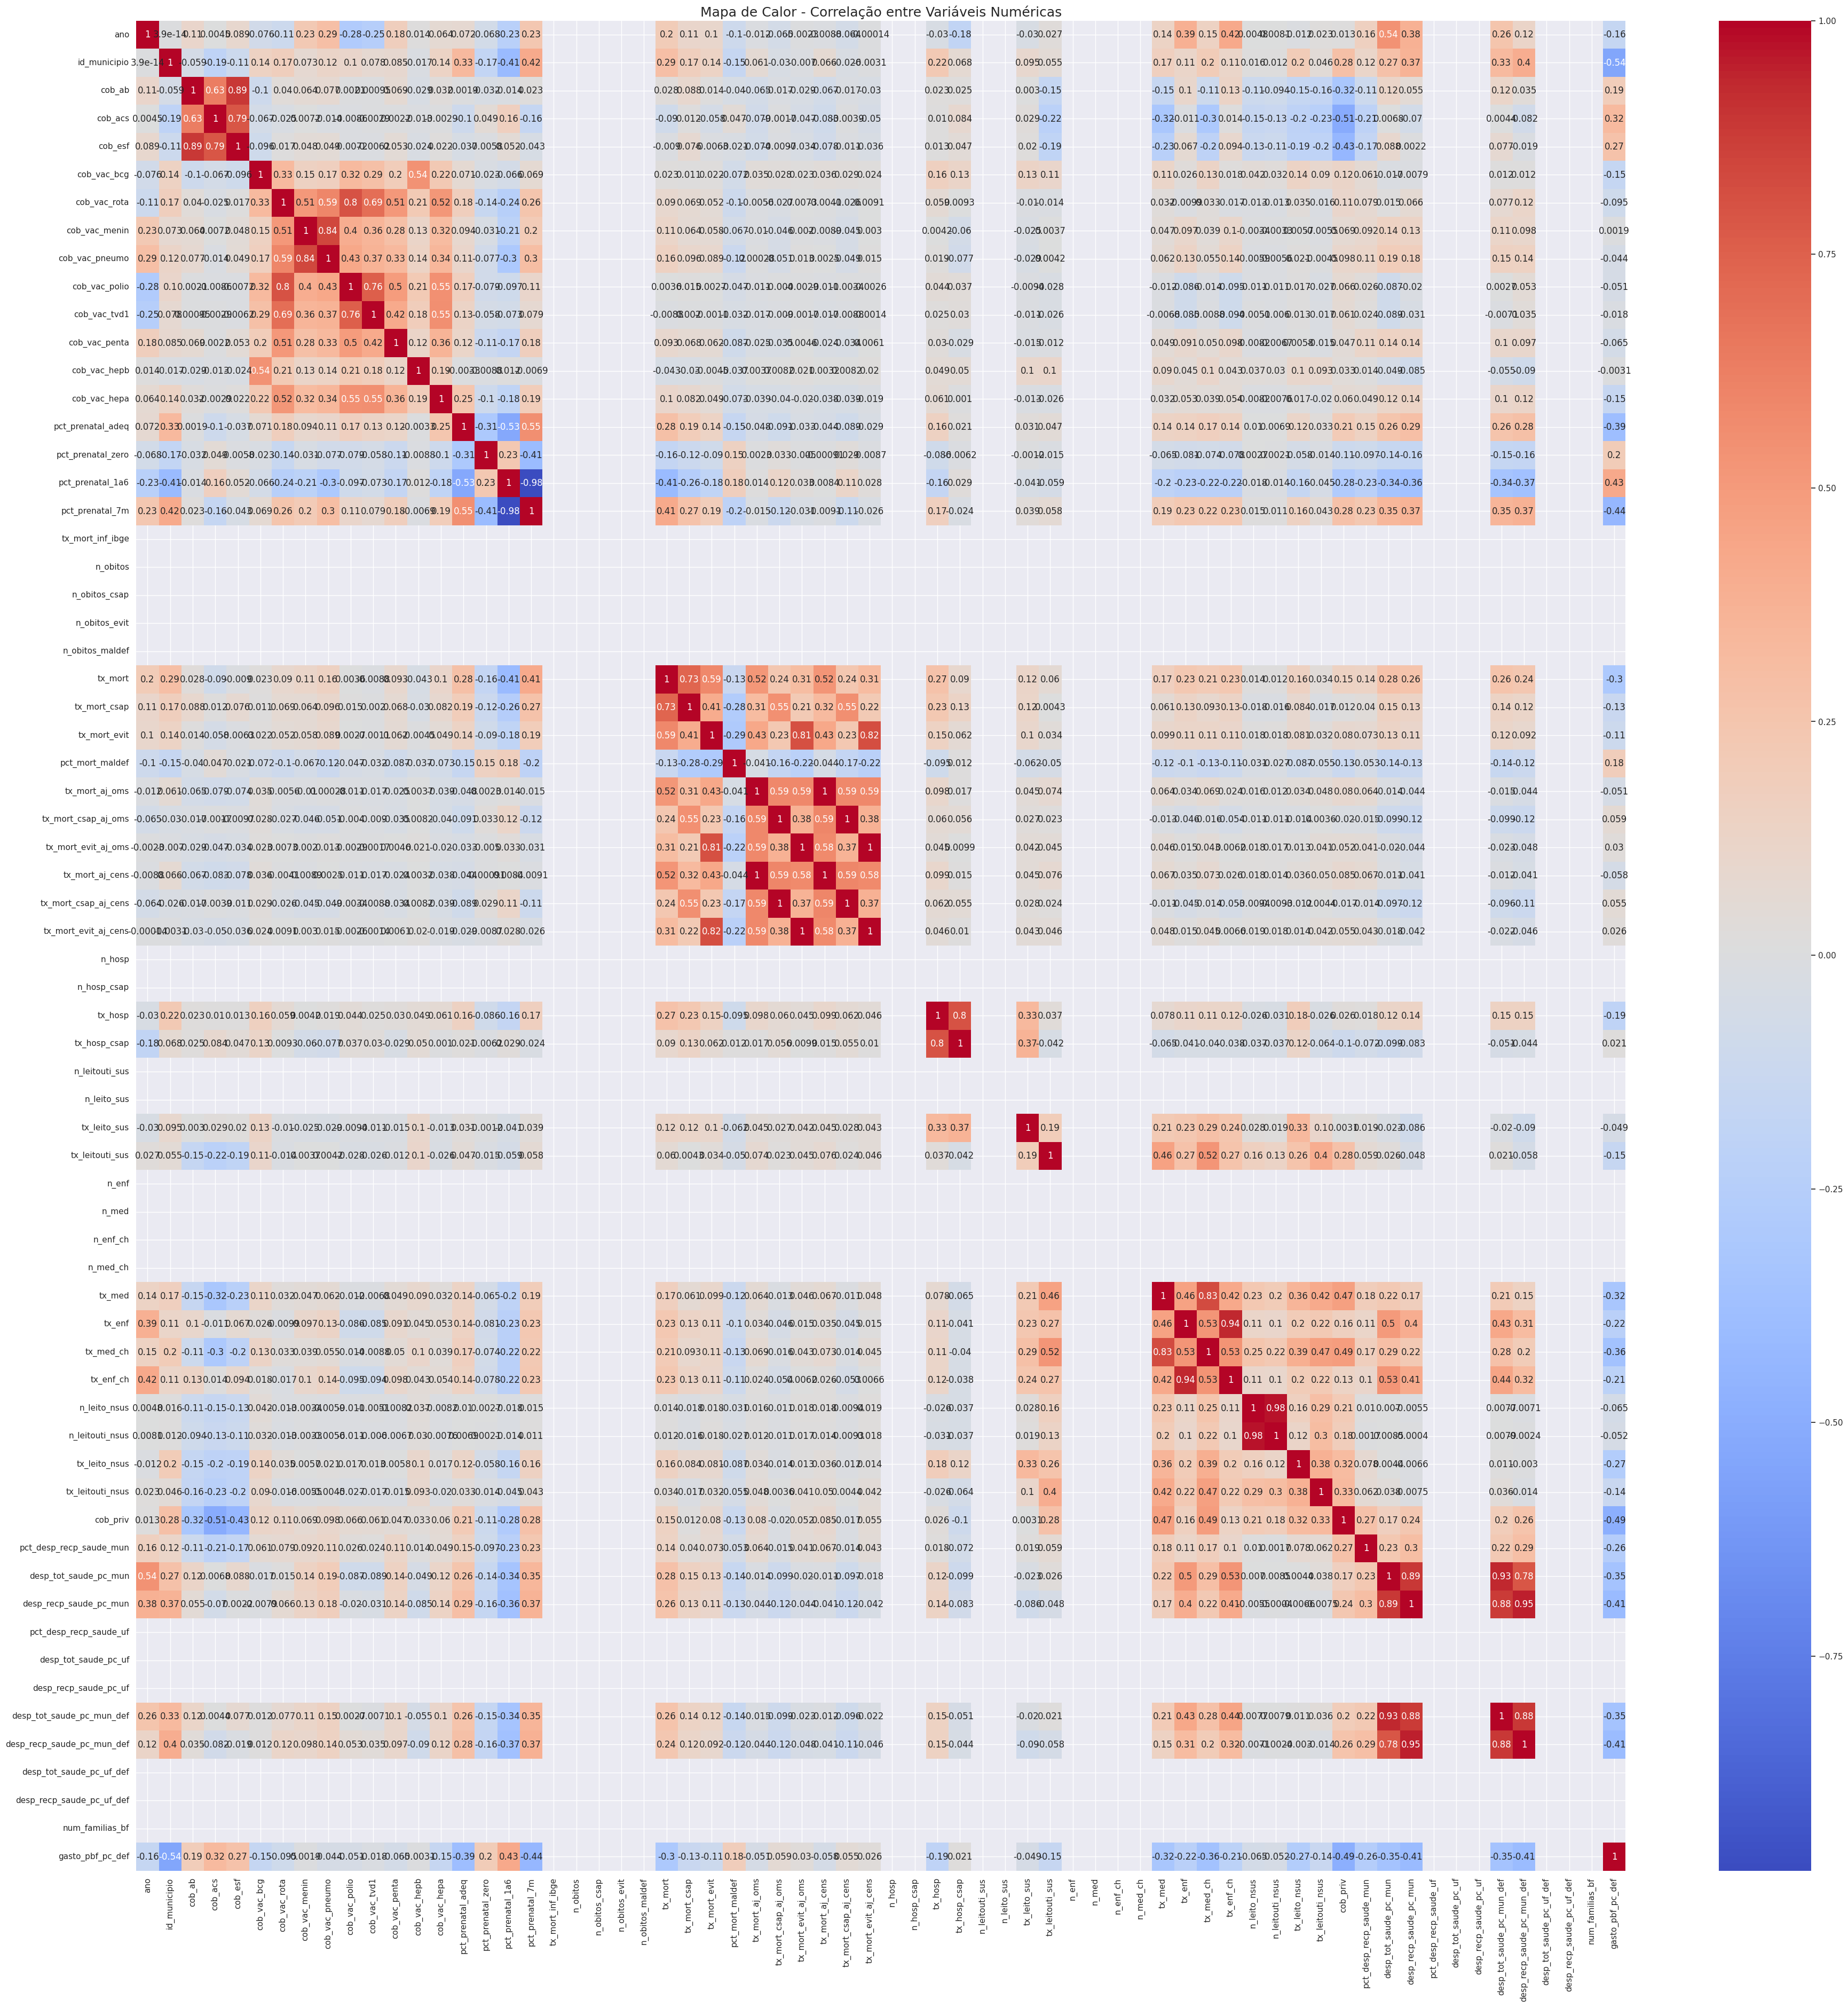

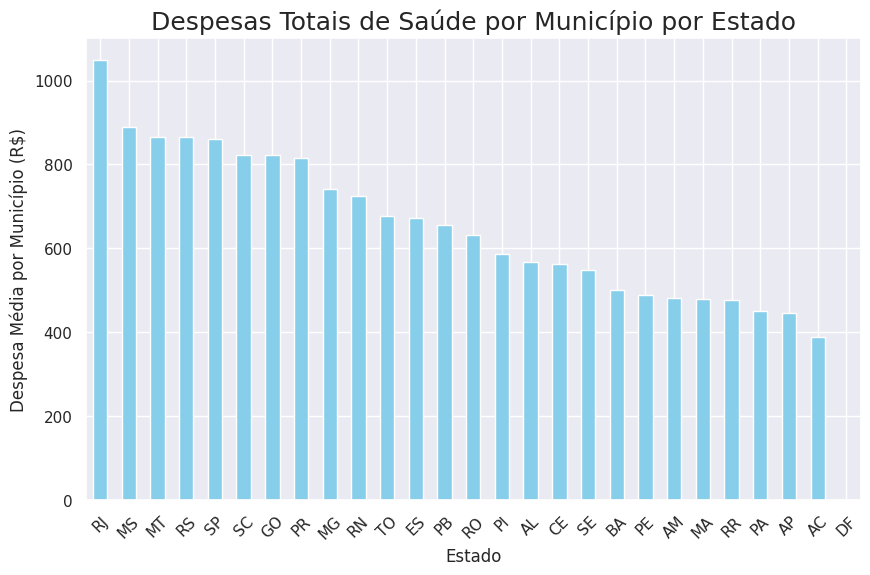

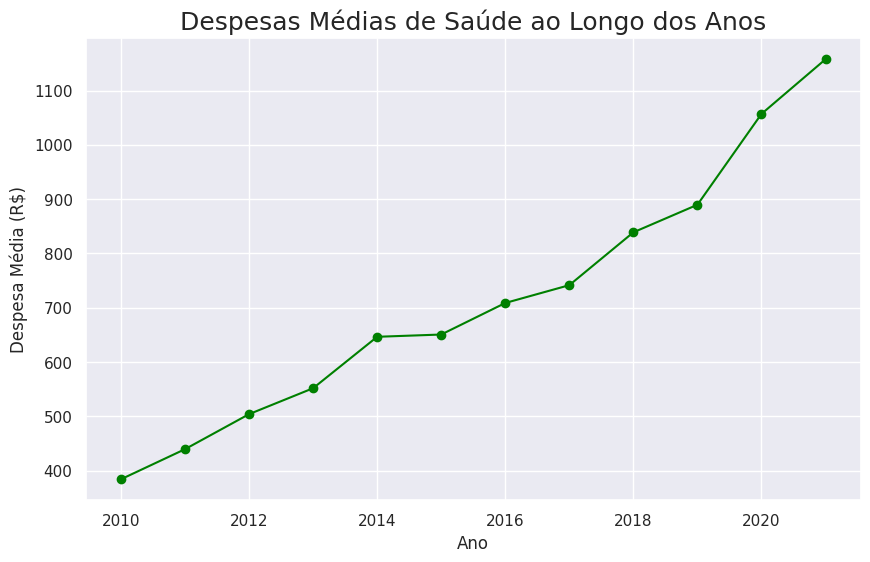

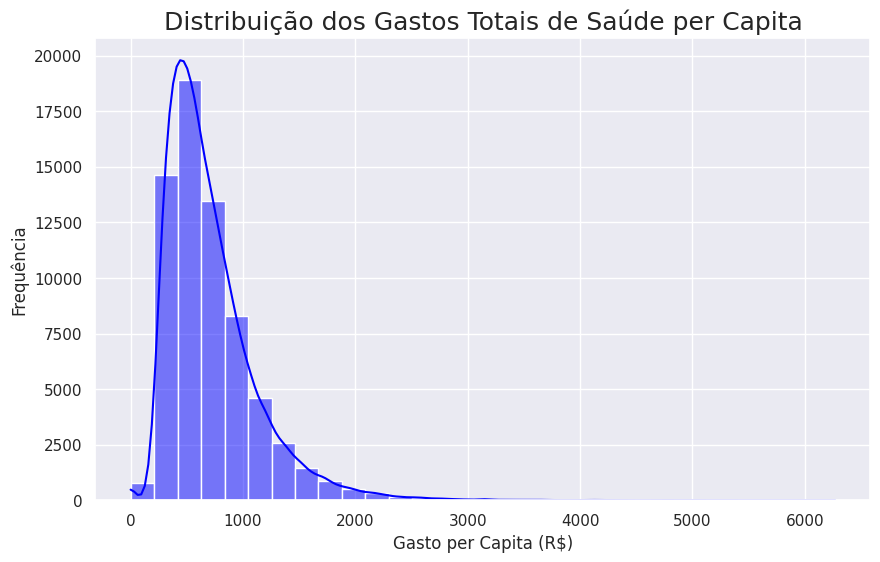

In [19]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Configurações de exibição
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 18

# Carregar o dataset
dataset_path = '../datasets/saude_despesas_limpo.csv'
saude = pd.read_csv(dataset_path)

# Visualizar as primeiras linhas do dataset
print(saude.head())

# Informações gerais sobre o dataset
print(saude.info())

# Estatísticas descritivas
print(saude.describe())

# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(saude.isnull().sum())

# Tratamento de valores ausentes (exemplo: substituir por 0 nas colunas financeiras)
colunas_financeiras = [col for col in saude.columns if 'desp' in col or 'gasto' in col]
saude[colunas_financeiras] = saude[colunas_financeiras].fillna(0)

# Selecionar apenas colunas numéricas
colunas_numericas = saude.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre variáveis numéricas
correlacao = colunas_numericas.corr()


plt.figure(figsize=(45, 45))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, cbar=True)
plt.title("Mapa de Calor - Correlação entre Variáveis Numéricas")
plt.show()


# Análise de despesas totais de saúde por estado
despesas_estado = saude.groupby('sigla_uf')['desp_tot_saude_pc_mun'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
despesas_estado.plot(kind='bar', color='skyblue')
plt.title('Despesas Totais de Saúde por Município por Estado')
plt.ylabel('Despesa Média por Município (R$)')
plt.xlabel('Estado')
plt.xticks(rotation=45)
plt.show()

# Análise temporal de despesas (supondo que há uma coluna "ano")
if 'ano' in saude.columns:
    despesas_ano = saude.groupby('ano')['desp_tot_saude_pc_mun'].mean()

    plt.figure(figsize=(10, 6))
    despesas_ano.plot(kind='line', marker='o', color='green')
    plt.title('Despesas Médias de Saúde ao Longo dos Anos')
    plt.ylabel('Despesa Média (R$)')
    plt.xlabel('Ano')
    plt.grid(True)
    plt.show()

# Análise por categoria de gasto (exemplo genérico; ajuste com base no dataset)
if 'categoria_gasto' in saude.columns:
    gastos_categoria = saude.groupby('categoria_gasto')['desp_tot_saude_pc_mun'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=gastos_categoria.index, y=gastos_categoria.values, palette='viridis')
    plt.title('Média de Gastos por Categoria')
    plt.ylabel('Despesa Média (R$)')
    plt.xlabel('Categoria de Gasto')
    plt.xticks(rotation=45)
    plt.show()

# Distribuição dos gastos per capita
plt.figure(figsize=(10, 6))
sns.histplot(saude['desp_tot_saude_pc_mun'], kde=True, color='blue', bins=30)
plt.title('Distribuição dos Gastos Totais de Saúde per Capita')
plt.xlabel('Gasto per Capita (R$)')
plt.ylabel('Frequência')
plt.show()

# Relação entre despesas e população
if 'populacao' in saude.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='populacao', y='desp_tot_saude_pc_mun', data=saude, alpha=0.7)
    plt.title('Relação entre População e Gastos Totais de Saúde per Capita')
    plt.xlabel('População')
    plt.ylabel('Gasto per Capita (R$)')
    plt.show()


## Municípios com maior gasto em saúde per capita apresentam maior cobertura de Estratégia de Saúde da Família (cob_esf)?

Valores ausentes:
desp_tot_saude_pc_mun    0
cob_esf                  0
dtype: int64


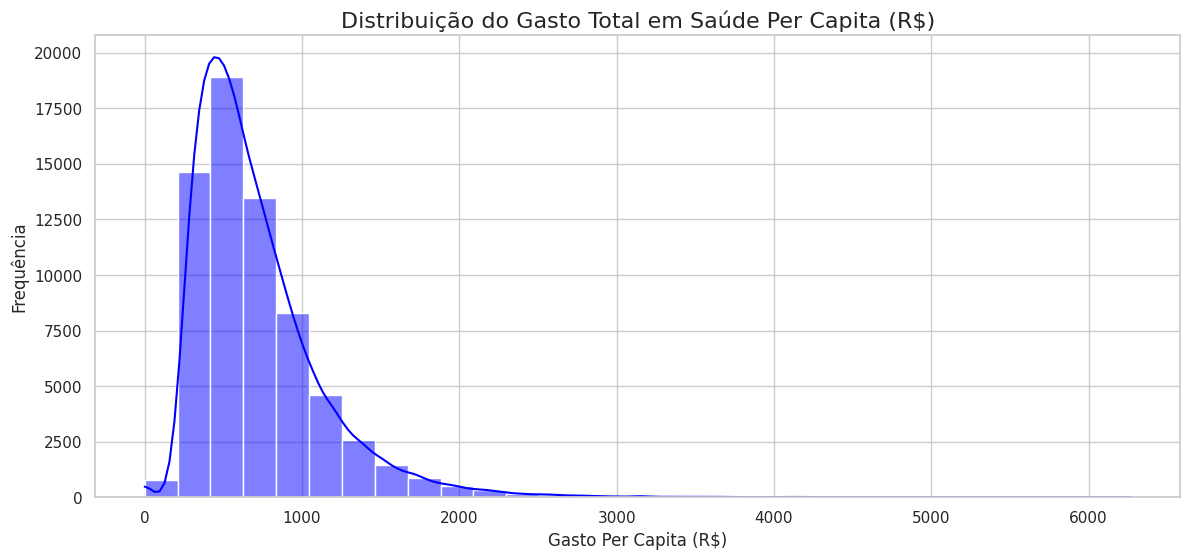

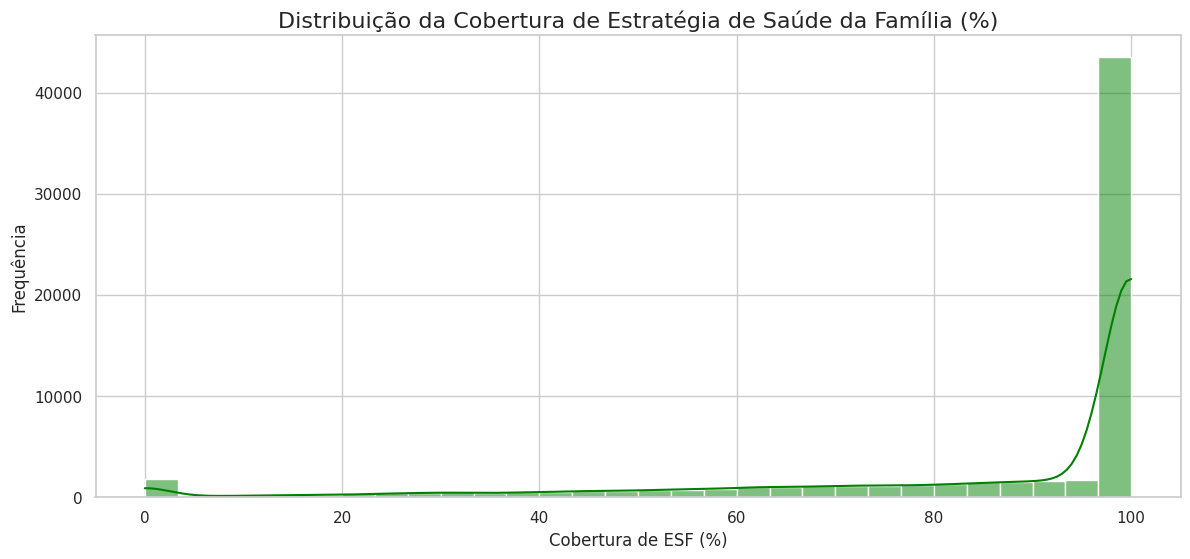

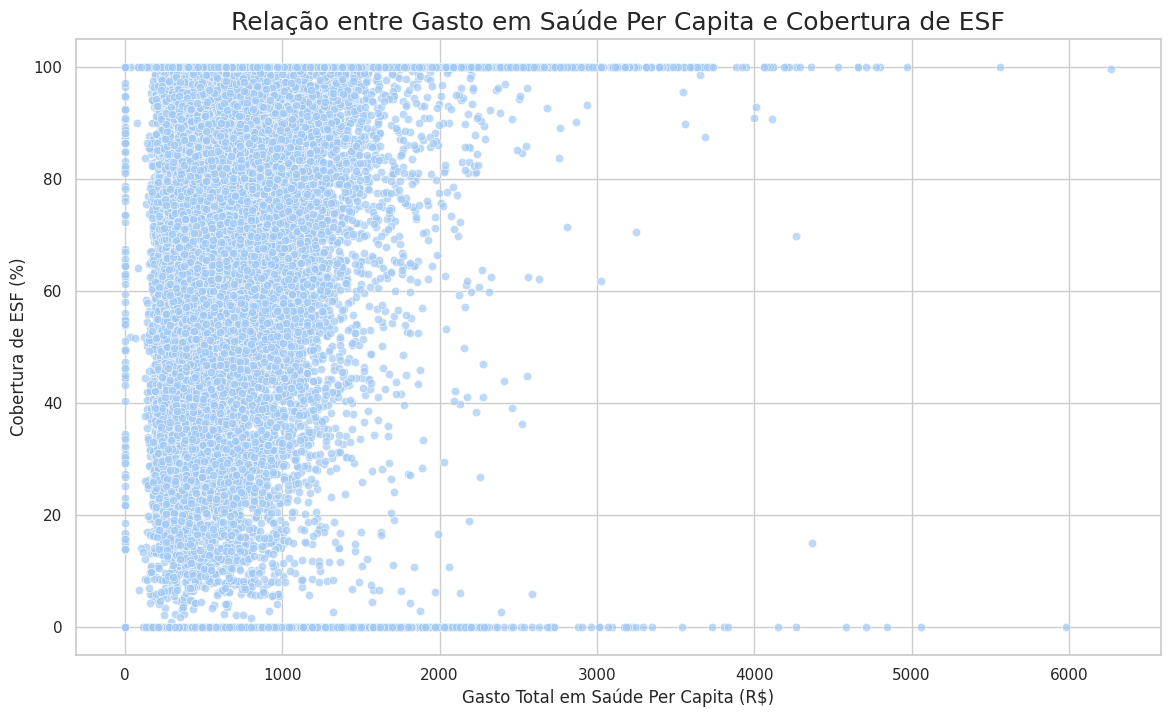

Correlação entre Gasto em Saúde Per Capita e Cobertura de ESF:
                       desp_tot_saude_pc_mun  cob_esf
desp_tot_saude_pc_mun                1.00000  0.08774
cob_esf                              0.08774  1.00000


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de exibição
sns.set(style='whitegrid', palette='pastel')

# Filtrar apenas colunas de interesse
dados_analise = saude[['desp_tot_saude_pc_mun', 'cob_esf']]

# Verificar valores ausentes
print("Valores ausentes:")
print(dados_analise.isnull().sum())

# Distribuição das variáveis
plt.figure(figsize=(14, 6))
sns.histplot(dados_analise['desp_tot_saude_pc_mun'], kde=True, bins=30, color='blue')
plt.title('Distribuição do Gasto Total em Saúde Per Capita (R$)', fontsize=16)
plt.xlabel('Gasto Per Capita (R$)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(dados_analise['cob_esf'], kde=True, bins=30, color='green')
plt.title('Distribuição da Cobertura de Estratégia de Saúde da Família (%)', fontsize=16)
plt.xlabel('Cobertura de ESF (%)')
plt.ylabel('Frequência')
plt.show()

# Relação entre as variáveis
plt.figure(figsize=(14, 8))
sns.scatterplot(x='desp_tot_saude_pc_mun', y='cob_esf', data=dados_analise, alpha=0.7)
plt.title('Relação entre Gasto em Saúde Per Capita e Cobertura de ESF', fontsize=18)
plt.xlabel('Gasto Total em Saúde Per Capita (R$)')
plt.ylabel('Cobertura de ESF (%)')
plt.grid(True)
plt.show()

# Calcular correlação
correlacao = dados_analise.corr()
print("Correlação entre Gasto em Saúde Per Capita e Cobertura de ESF:")
print(correlacao)


## Existe uma diferença significativa na cobertura de agentes comunitários de saúde (cob_acs) em municípios com maior despesa própria municipal em saúde (desp_recp_saude_pc_mun)?

Valores únicos por coluna:
desp_tot_saude_pc_uf          1
tx_mort_inf_ibge              0
cob_acs                    8282
desp_recp_saude_pc_mun    44707
dtype: int64

Verificar valores ausentes:
desp_tot_saude_pc_uf          0
tx_mort_inf_ibge          66840
cob_acs                       0
desp_recp_saude_pc_mun        0
dtype: int64
Os dados não possuem variação suficiente para criar o gráfico.


/tmp/ipykernel_378902/740491294.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(baixo_gasto['cob_acs'], label='Baixo Gasto', shade=True, color='blue')
/tmp/ipykernel_378902/740491294.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alto_gasto['cob_acs'], label='Alto Gasto', shade=True, color='red')


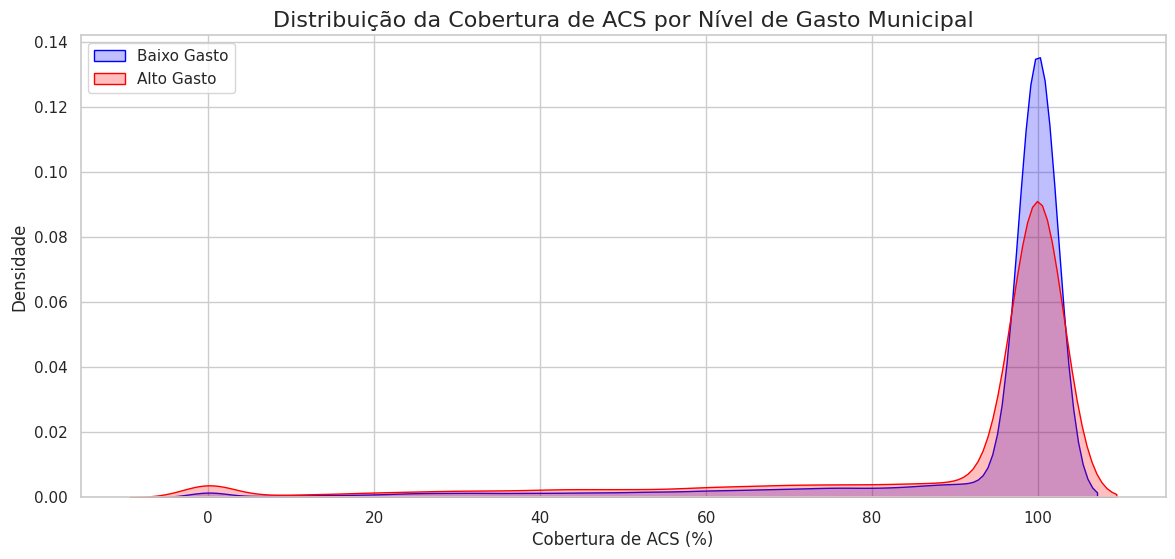

In [17]:
# Verificar colunas e identificar valores únicos ou ausentes
print("Valores únicos por coluna:")
print(saude[['desp_tot_saude_pc_uf', 'tx_mort_inf_ibge', 'cob_acs', 'desp_recp_saude_pc_mun']].nunique())

print("\nVerificar valores ausentes:")
print(saude[['desp_tot_saude_pc_uf', 'tx_mort_inf_ibge', 'cob_acs', 'desp_recp_saude_pc_mun']].isnull().sum())

# Remover linhas com valores ausentes
dados_analise = saude[['desp_tot_saude_pc_uf', 'tx_mort_inf_ibge']].dropna()

# Verificar novamente se há variação nos dados
if dados_analise['desp_tot_saude_pc_uf'].nunique() > 1 and dados_analise['tx_mort_inf_ibge'].nunique() > 1:
    # Relação entre as variáveis
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='desp_tot_saude_pc_uf', y='tx_mort_inf_ibge', data=dados_analise, alpha=0.7)
    plt.title('Relação entre Gasto Estadual Per Capita e Mortalidade Infantil', fontsize=18)
    plt.xlabel('Gasto Estadual Per Capita (R$)')
    plt.ylabel('Taxa de Mortalidade Infantil (por mil)')
    plt.grid(True)
    plt.show()
else:
    print("Os dados não possuem variação suficiente para criar o gráfico.")

# Verificar dados para análise da cobertura de ACS
dados_cob_acs = saude[['desp_recp_saude_pc_mun', 'cob_acs']].dropna()

if dados_cob_acs['desp_recp_saude_pc_mun'].nunique() > 1 and dados_cob_acs['cob_acs'].nunique() > 1:
    # Divisão entre alto e baixo gasto
    mediana_gasto = dados_cob_acs['desp_recp_saude_pc_mun'].median()
    baixo_gasto = dados_cob_acs[dados_cob_acs['desp_recp_saude_pc_mun'] <= mediana_gasto]
    alto_gasto = dados_cob_acs[dados_cob_acs['desp_recp_saude_pc_mun'] > mediana_gasto]

    # Comparar distribuições
    plt.figure(figsize=(14, 6))
    sns.kdeplot(baixo_gasto['cob_acs'], label='Baixo Gasto', shade=True, color='blue')
    sns.kdeplot(alto_gasto['cob_acs'], label='Alto Gasto', shade=True, color='red')
    plt.title('Distribuição da Cobertura de ACS por Nível de Gasto Municipal', fontsize=16)
    plt.xlabel('Cobertura de ACS (%)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
else:
    print("Os dados de cobertura de ACS e gasto municipal não possuem variação suficiente para análise.")


## Municípios com maior despesa per capita em saúde municipal (desp_tot_saude_pc_mun) possuem maior número de médicos por 1.000 habitantes (tx_med)?

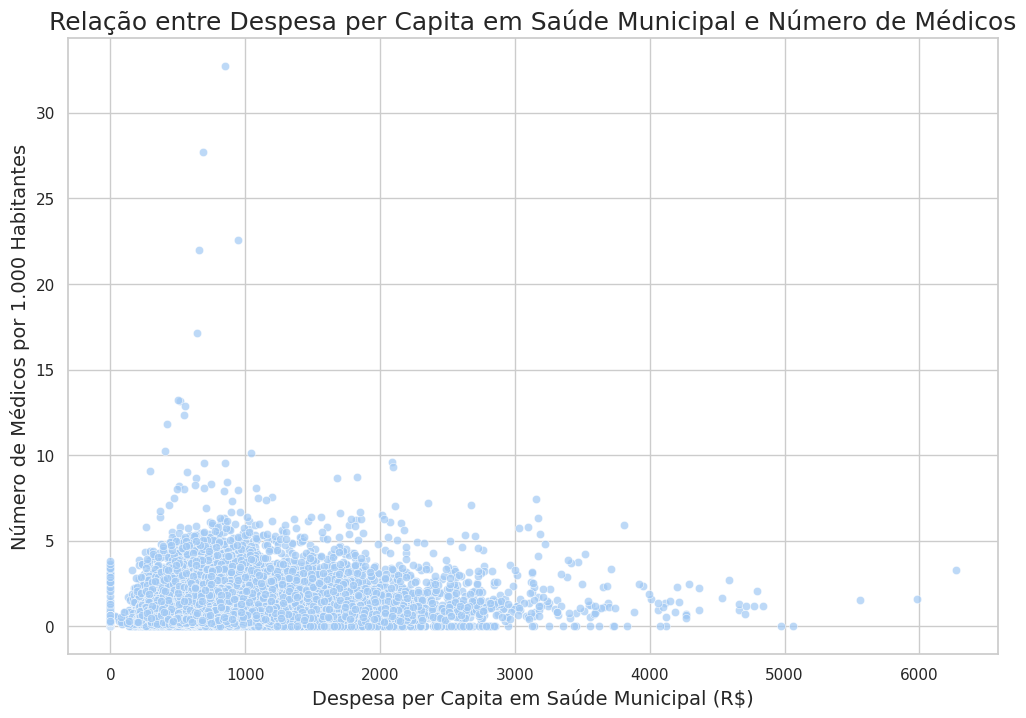

Correlação entre despesa per capita e número de médicos: 0.22


In [18]:
# Analisar a relação entre despesa per capita em saúde municipal e número de médicos por 1.000 habitantes
plt.figure(figsize=(12, 8))
sns.scatterplot(x=saude['desp_tot_saude_pc_mun'], y=saude['tx_med'], alpha=0.7)

# Adicionar título e rótulos
plt.title('Relação entre Despesa per Capita em Saúde Municipal e Número de Médicos', fontsize=18)
plt.xlabel('Despesa per Capita em Saúde Municipal (R$)', fontsize=14)
plt.ylabel('Número de Médicos por 1.000 Habitantes', fontsize=14)
plt.grid(True)

# Exibir gráfico
plt.show()

# Calcular correlação
correlacao = saude[['desp_tot_saude_pc_mun', 'tx_med']].corr().iloc[0, 1]
print(f"Correlação entre despesa per capita e número de médicos: {correlacao:.2f}")
